## 30个城市训练集

In [ ]:
import osmnx as ox
import momepy
import networkx as nx
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


# 定义城市老街的中心点经纬度
# locations = {
#     "Shanghai_NanJing_Lu": (31.2350, 121.4730),  # 上海南京路
#     "Shanghai_Wukang_Lu": (31.2088, 121.4365),  # 武康路
#     "Wuhan_Jianghan_Lu": (30.5771, 114.2815),  # 江汉路
#     "Wuhan_Jiananjie": (30.5066, 114.3145),  # 建安街
#     "Beijing_Guozijian": (39.9474, 116.4184),  # 国子监
#     "Beijing_Dongzhimen": (39.9320, 116.4280),  # 东直门
#     "Guangzhou_Beijing_Lu": (23.1248, 113.2709),  # 北京路
#     "Guangzhou_FengHuangCun": (23.1029, 113.2523),  # 凤凰新村
#     "Nanjing_DaXingGong":(32.0417, 118.7895), #大行宫
#     "Nanjing_Gulou":(32.0559, 118.7789) #鼓楼
#
# }
locations = {
    "Beijing_Huangcheng": (39.91695981099465, 116.397054880332),       # 北京市皇城历史文化街区
    "Beijing_Dashilan": (39.89292780482306, 116.39299051221566),         # 北京市大栅栏历史文化街区
    "Beijing_Dongsi": (39.92666734966571, 116.42189649203904),           # 北京市东四三条至八条历史文化街区
    "Tianjin_Wudadao": (39.11054205070556, 117.20086775427028),          # 天津市五大道历史文化街区
    "Changchun_Yiqi": (43.857330783586434, 125.2478463308985),           # 吉林省长春市第一汽车制造厂历史文化街区
    "Qiqihar_Luoxiya": (47.161318521505414, 123.81424855833257),          # 黑龙江省齐齐哈尔市罗西亚大街历史文化街区
    "Shanghai_Waitan": (31.238467199117693, 121.48551193289521),          # 上海市外滩历史文化街区
    "Nanjing_Meiyuan": (32.042971722413284, 118.8027137728247),        # 江苏省南京市梅园新村历史文化街区
    "Nanjing_Yihe": (32.06360231433038, 118.76717680260957),        # 江苏省南京市颐和路历史文化街区
    "Suzhou_Pinjiang": (31.309639966195373, 120.63483911953438),          # 江苏省苏州市平江历史文化街区
    "Suzhou_Shantang": (31.3224721425525, 120.5965320123319),          # 江苏省苏州市山塘街历史文化街区
    "Yangzhou_Nanhexia": (32.39772235564695, 119.44103934470861),        # 江苏省扬州市南河下历史文化街区
    "Hangzhou_Zhongshan": (30.25063190134612, 120.17034478504638),       # 浙江省杭州市中山中路历史文化街区
    "Longquan_Xijie": (28.073404609513062, 119.13949857767521),           # 浙江省龙泉市西街历史文化街区
    "Lanxi_Fushan": (29.211942307772592, 119.45814672832216),             # 浙江省兰溪市福山历史文化街区
    "Shaoxing_Cangqian": (30.008407615949324, 120.5842671865074),        # 浙江省绍兴市仓前（书圣故里）历史文化街区
    "Huangshan_Tunxi": (29.708642284789953, 118.30735088084276),          # 安徽省黄山市屯溪老街历史文化街区
    "Fuzhou_Sanfang": (26.082622724630625, 119.29761037178783),           # 福建省福州市三坊七巷历史文化街区
    "Quanzhou_Zhongshan": (24.895043867835074, 118.58826085331604),           # 福建省泉州市中山路历史文化街区
    "Xiamen_Gulangyu": (24.445088715394416, 118.06931265065646),         # 福建省厦门市鼓浪屿历史文化街区
    "Zhangzhou_Nanjing": (24.507476701766045, 117.65356098111424),        # 福建省漳州市南靖南门历史文化街区
    "Wuhan_Jianghan": (30.57596954288987, 114.28586134378092),           # 湖北省武汉市江汉路及中山大道历史文化街区
    "Yongzhou_Liuzijie": (26.219075162790592, 111.60965091277394),        # 湖南省永州市柳子街历史文化街区
    "Zhongshan_Sunwenxi": (22.52138900071977, 113.36956262188416),          # 广东省中山市孙文西历史文化街区
    "Beihai_Zhuhai": (21.66679630062758, 109.21203853913865),         # 广西壮族自治区北海市珠海路-沙湾街-中山路历史文化街区
    "Chongqing_Ciqikou": (29.579487440046126, 106.45174009718681),        # 重庆市沙坪坝区磁器口历史文化街区
    "Langzhong_Huaguang": (31.57826318284614, 105.97169711410982),     # 四川省阆中市华光楼历史文化街区
    "Honghe_Shipin": (23.710862758754892, 102.49261670276698),          # 云南省石屏县古城区历史文化街区
    "Kuche_Resitan": (41.71410109127801, 82.9733105909483),           # 新疆维吾尔族自治区库车县热斯坦历史文化街区
    "Yining_Qianjin": (43.8983526542795, 81.33295364362321)        # 新疆维吾尔族自治区伊宁市前进街历史文化街区
}
locations_for_gen = {
    "Anhui_Yushan": (31.675215, 118.504897),
    "Anhui_Yushan": (31.675215, 118.504897),
    "Guangzhou_Zumiao": (23.021738, 113.109713),
    "Jinan_Shanda": (36.660708, 117.049799),
    "Zhengzhou_Zhongyuan": (34.74865, 113.61084)
}

# 定义三类道路的颜色
road_categories = {
    "Highways": ["motorway", "trunk", "primary","secondary"],  # 干道
    "Main Roads": ["residential","tertiary"],  # 支路
    "Local Streets": ["unclassified", "service", "footway", "cycleway", "living_street","pedestrian"],  # 街巷
}
# 定义不同道路类型的颜色
# 设置类别颜色
road_colors = {
    "Highways": "red",
    "Main Roads": "orange",
    "Local Streets": "purple",
}
road_linewidth = {
    "Highways": 3,
    "Main Roads":2,
    "Local Streets":1.5,
}

# 设置爬取范围（单位：米）
radius = 1000  # 1公里

# 遍历街区并爬取/读取道路网络
for name, (lat, lon) in tqdm(locations.items(), desc="Processing Locations", unit="location"):
    filename = f"{name}.graphml"

    # 检查文件是否存在，若存在则直接读取，否则爬取
    if os.path.exists(filename):
        print(f"{name} 数据已缓存，直接加载...")
        graph = ox.load_graphml(filename)
    else:
        print(f"正在下载 {name} 的道路数据...")
        graph = ox.graph_from_point((lat, lon), dist=radius, network_type="all", simplify=True)
        ox.save_graphml(graph, filename)

    # 获取节点和边的 GeoDataFrame
    nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)
    edges["highway"] = edges["highway"].apply(lambda x: x[0] if isinstance(x, list) else x)

    # # 创建黑底图
    # fig, ax = plt.subplots(figsize=(10, 10))
    # fig.patch.set_facecolor("white")
    # # 绘制节点
    #
    #
    # # 遍历三类道路，分别绘制
    # for category, road_types in road_categories.items():
    #     subset = edges[edges["highway"].isin(road_types)]
    #     if not subset.empty:
    #         subset.plot(ax=ax, linewidth=road_linewidth[category], color=road_colors[category], label=category)
    # nodes.plot(ax=ax, color="black", alpha=0.3,markersize=20, label="Nodes")
    # # plt.legend(title="Road Type", fontsize="small", loc="upper right")
    # # plt.title(name.replace("_", " ") + " - Road Network by Category")
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.set_frame_on(False)
    # plt.show()


print("所有街区的道路网络数据已成功下载/加载并可视化。")


# 通过GeoData构建图

In [76]:
import networkx as nx
import os
from tqdm import tqdm
def unify_and_clean_node_attributes(g, keep_fields=['x', 'y', 'street_count']):
    removed_count = 0
    for n in g.nodes:
        attr = g.nodes[n]
        keys_to_remove = [k for k in attr if k not in keep_fields]
        removed_count += len(keys_to_remove)
        for k in keys_to_remove:
            del attr[k]
        # 补充缺失字段
        for field in keep_fields:
            if field not in attr:
                attr[field] = 0.0
    return removed_count

# 泽
folder_path = 'road_network_cache'
filenames = [f for f in os.listdir(folder_path) if f.endswith('.graphml')]

graphs = []



for fname in tqdm(filenames):
    g_clean = nx.read_graphml(os.path.join(folder_path, fname))

    for n in g_clean.nodes:
        attr = g_clean.nodes[n]
        # attr['degree'] = g_clean.degree[n]  # 添加 degree 作为辅助属性

    # Step 3: 保留边的 length 字段，清理多余字段（可选）
    for u, v, attr in g_clean.edges( data=True):
        # 如果只想保留 length
        keys_to_remove = [k for k in attr if k not in ('length', 'highway')]
        for k in keys_to_remove:
            del attr[k]
        removed = unify_and_clean_node_attributes(g_clean)
    graphs.append(g_clean)

100%|██████████| 30/30 [00:13<00:00,  2.24it/s]


In [77]:
# list(graphs[0].nodes)[:5]  # 查看前5个节点的ID
# graphs[0].nodes(data=True)  # 查看所有节点及其属性
list(graphs[0].nodes(data=True))[:1]  # 取前5个
list(graphs[0].edges(data=True))[:5]  # 取前5个

[('2939779601',
  '7537740584',
  {'highway': 'tertiary', 'length': '280.7362297311355'}),
 ('2939779601',
  '7537740541',
  {'highway': 'tertiary', 'length': '9.89399920778998'}),
 ('2939779601',
  '7537740518',
  {'highway': 'primary', 'length': '361.4020572710794'}),
 ('2939779634',
  '6711378563',
  {'highway': 'tertiary', 'length': '9.63571430960489'}),
 ('2939779634',
  '7538189671',
  {'highway': 'primary', 'length': '75.40272122964734'})]

In [78]:
# 示例：查看第一个图的 5 个节点及其属性
g = graphs[0]
for n, attr in list(g.nodes(data=True))[:20]:
    print(n, attr)

# 查看前 5 条边及其属性
for u, v, attr in list(g.edges(data=True))[:5]:
    print(u, v, attr)


2939779601 {'y': '21.6745046', 'x': '109.2195849', 'street_count': '4'}
2939779634 {'y': '21.6578843', 'x': '109.2104807', 'street_count': '5'}
2939779650 {'y': '21.6681384', 'x': '109.202498', 'street_count': '4'}
2939779679 {'y': '21.6734386', 'x': '109.2042439', 'street_count': '4'}
2939779815 {'y': '21.6621288', 'x': '109.2042384', 'street_count': '4'}
2939779824 {'y': '21.6658791', 'x': '109.2074463', 'street_count': '4'}
2939779877 {'y': '21.6631522', 'x': '109.2133689', 'street_count': '4'}
2939779900 {'y': '21.6715614', 'x': '109.2106083', 'street_count': '4'}
2939780015 {'y': '21.6694129', 'x': '109.2150102', 'street_count': '4'}
2939780024 {'y': '21.671468', 'x': '109.2108083', 'street_count': '4'}
2939780075 {'y': '21.6622473', 'x': '109.2040715', 'street_count': '4'}
5135054212 {'y': '21.6600366', 'x': '109.220644', 'street_count': '4'}
5135054215 {'y': '21.6601894', 'x': '109.2206956', 'street_count': '4'}
5135054246 {'y': '21.668065', 'x': '109.2024613', 'street_count': '

In [80]:
from torch_geometric.utils import from_networkx

pyg_graphs = []
for g in graphs:
    # 可以选择只保留 node 和 edge 上的特征属性，如长度、type、degree 等
    data = from_networkx(g)
    pyg_graphs.append(data)
print(pyg_graphs[0])

Data(x=[254], edge_index=[2, 632], y=[254], street_count=[254], highway=[632], length=[632], created_date='2025-06-15 14:06:23', created_with='OSMnx 2.0.1', crs='epsg:4326', simplified='True')


#  可视化图

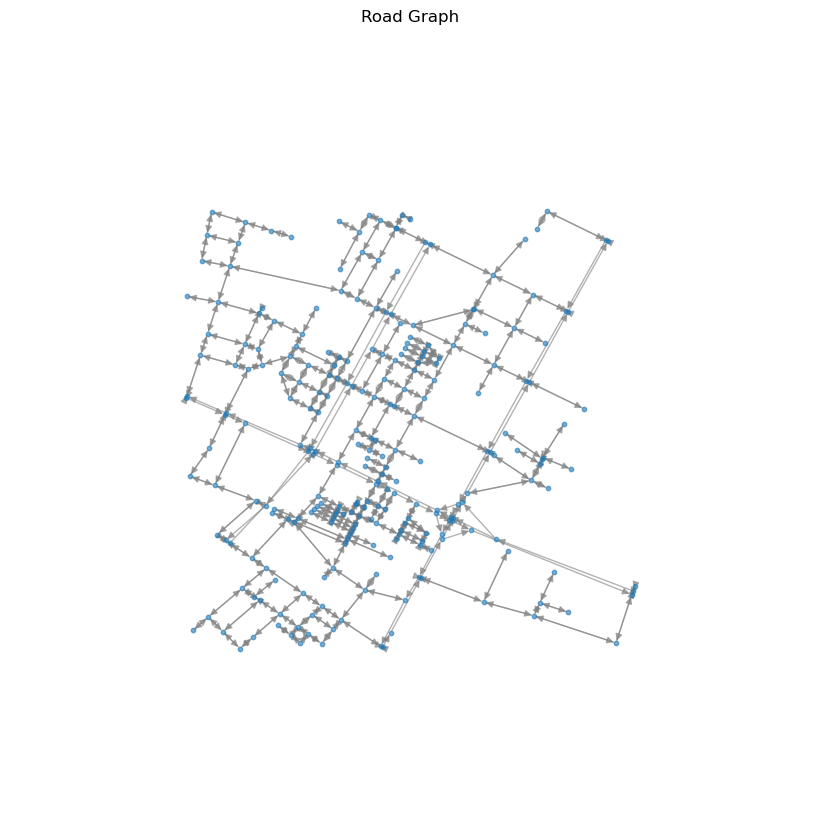

In [79]:
import matplotlib.pyplot as plt

g = graphs[0]  # 选第一个图
pos = {n: (float(d['x']), float(d['y'])) for n, d in g.nodes(data=True)}

plt.figure(figsize=(8, 8))
nx.draw(g, pos, node_size=10, edge_color='gray', alpha=0.6)
plt.axis('equal')
plt.title("Road Graph")
plt.show()

# 定义训练集

In [ ]:
from torch_geometric.data import InMemoryDataset

class MyRoadDataset(InMemoryDataset):
    def __init__(self, data_list):
        super().__init__()
        self.data_list = data_list

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]